# Foundations of Data Mining: Assignment 3


Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

 **Deadline:** Thursday, March 29,  2018

In [1]:
%matplotlib inline
from preamble import *

import sklearn.decomposition as deco
import sklearn.manifold as manifold

plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
#InteractiveShell.ast_node_interactivity = "all" 

## PCA and Isomap (5 Points, 1+2+2)

Apply PCA and Isomap to images of handwritten digits (see below). You may use sklearn.decomposition and sklearn.manifold.

### a)  
Compute the first two components of the data using PCA. Make a scatter plot of the data in the first two components of PCA indicating class with color.

### b)
 Compute an Isomap embedding with two components with nr_neighbors={5, 50, N-1} (three separate embeddings).
 For each of the Isomap embeddings, apply the function "align" (see below) with "ref_data" as your computed pca embedding and "data" as the isomap embedding. Show a scatter plot of each of the aligned isomap embeddings.
 
### c)

Visually compare how well the classes are separated in the different scatter plots. What is the effect of changing the number of neighbors on the score computed in the alignment function? What does it mean if the score is zero? When do you expect the score to become zero and why?


In [2]:
# Load the data set
from sklearn import datasets
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
N=len(X)

# Align a data set with a reference data set minimizing l_1 error
# Returns aligned data set and alignment error
def align(ref_data, data):
    
    transformations = np.asarray([
        [[0,1],[1,0]], 
        [[0,-1],[1,0]], 
        [[0,1],[-1,0]], 
        [[0,-1],[-1,0]], 
        [[1,0],[0,1]], 
        [[1,0],[0,-1]], 
        [[-1,0],[0,1]], 
        [[-1,0],[0,-1]] 
    ])
    
    score = []
    for i in range(len(transformations)):
        transf_data =   np.matmul(data, transformations[i])
        score.append(np.linalg.norm( transf_data - ref_data, ord=1) )
        
    idx = np.argmin(score)
    transf_data = np.matmul(data,transformations[idx])
    
    print("Aligned the data sets. Score is {0:10.1f}  ".format(score[idx]))
    
    return transf_data, score[idx]


### a)


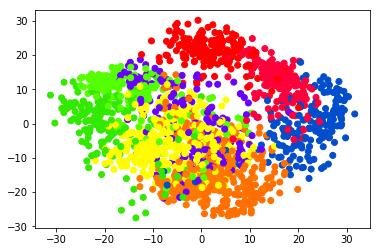

In [3]:
# a)
pca = deco.PCA(n_components=2)
X_new = pca.fit_transform(X)
y.tolist()
plt.scatter(X_new[:,0], X_new[:,1], c=y, cmap=plt.cm.prism)


### b)


Aligned the data sets. Score is   102234.2  
Aligned the data sets. Score is    31067.5  
Aligned the data sets. Score is        0.0  


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

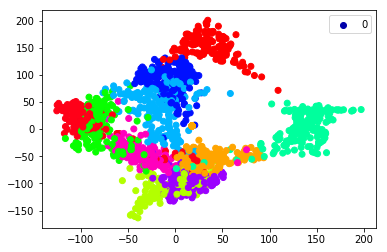

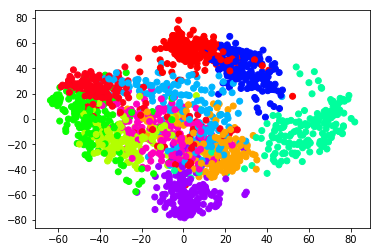

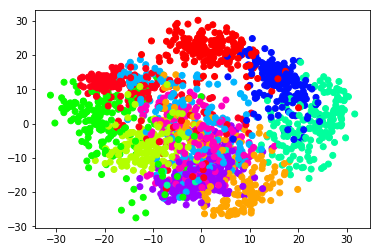

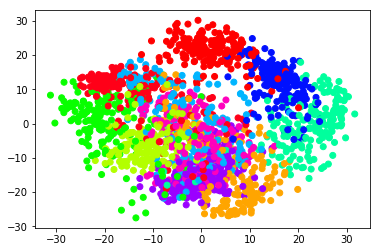

In [6]:
# b)
from sklearn.manifold import Isomap

isomap5 = Isomap(5,2)
iso5, score5 = align(X_new, isomap5.fit_transform(X))
isomap50 = Isomap(50,2)
iso50, score50 = align(X_new, isomap50.fit_transform(X))
isomapN = Isomap(len(y)-1,2)
isoN, scoreN = align(X_new, isomapN.fit_transform(X))
plt.figure()
plt.scatter(iso5[:,0], iso5[:,1], c=y, cmap=plt.cm.hsv)
plt.legend(np.unique(y))
plt.figure()
plt.scatter(iso50[:,0], iso50[:,1], c=y, cmap=plt.cm.hsv)
plt.figure()
plt.scatter(isoN[:,0], isoN[:,1], c=y, cmap=plt.cm.hsv)
plt.figure()
plt.scatter(X_new[:,0], X_new[:,1], c=y, cmap=plt.cm.hsv)
np.unique(y)


### c)
- Visually compare how well the classes are separated in the different scatter plots. *We can see that the classes are best separated using 5 neighbours. The separation gets worse when the number of neighbours increases.*
- What is the effect of changing the number of neighbors on the score computed in the alignment function? *The score calculates max(sum(abs(transfromed data-reference data))) over the collumns. With increased number of neighbours we see that this score gets lower.*
- What does it mean if the score is zero? When do you expect the score to become zero and why? *When the score is 0 then there is no difference in between both datasets. This means that the (tranformed) isomap with two components computed with N-1 neighbours is equal to the first 2 principal components. By taking N-1 as the number of neighbours, we lose the manyfold assumption and thus compute the principal components.*

## Classical Multidimensional Scaling (6 Points, 1+2+2+1)

Show that for mean-centered data sets we can recover inner products using
pairwise distance information only. This is used by the isomap embedding algorithm.

We are given all squared pairwise distances of an otherwise unknown
point set ${\bf p}_1,\dots, {\bf p}_n \in \mathbb{R}^d$, i.e., we are given 
for all $1 \leq i,j \leq n$ the values

$$  d_{ij} = \|{\bf p}_i - {\bf p}_j\|^2. $$

We assume that the point set is mean-centered, that is 

$$ \sum_{i=1}^{n} {\bf p}_i = \vec{{\bf 0}}.$$

(where $\vec{{\bf 0}}$ is the vector of zeros)


In the following, $\langle {\bf p}_i , {\bf p}_j \rangle$ denotes the inner 
product of ${\bf p}_i$ and ${\bf p}_j$. 
Prove that the following holds true for mean-centered point sets: 

$$-2 \langle {\bf p}_i , {\bf p}_j \rangle = 
d_{ij}
- \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n}   
-  \sum_{\ell=1}^{n} \frac{d_{j\ell}}{n} 
+ \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{n^2} 
$$

You may use the following steps in your derivation.

### a) 
Expand  $d_{ij}$ to yield an expression of $\langle {\bf p}_i, {\bf p}_j \rangle$, $\|{\bf p}_i\|^2$ and $\|{\bf p}_j\|^2$.

---

\begin{align}
d_{ij}  &= \|{\bf p}_i - {\bf p}_j\|^2 \\
        &= \langle {\bf p}_i - {\bf p}_j, {\bf p}_i - {\bf p}_j \rangle \\
        &= \langle {\bf p}_i - {\bf p}_j, {\bf p}_i \rangle - \langle {\bf p}_i - {\bf p}_j, {\bf p}_j \rangle \\
        &= (\langle {\bf p}_i, {\bf p}_i \rangle - \langle {\bf p}_j, {\bf p}_i \rangle) - (\langle {\bf p}_i, {\bf p}_j \rangle - \langle {\bf p}_j, {\bf p}_j \rangle) \\
        &= -2 \langle {\bf p}_i, {\bf p}_j \rangle +  \langle {\bf p}_i, {\bf p}_i \rangle +  \langle {\bf p}_j, {\bf p}_j \rangle \\
        &= -2 \langle {\bf p}_i, {\bf p}_j \rangle + \|{\bf p}_i\|^2 + \|{\bf p}_j\|^2
\end{align}

### b) 
Show that the following holds for any $ {\bf q} \in \mathbb{R}^d$:
$$ \sum_{1 \leq i \leq n} \langle {\bf p}_i , {\bf q} \rangle =   0$$

---

\begin{align}
\sum_{i = 1}^{n} \langle {\bf p}_i , {\bf q} \rangle 
    &= \left\langle \sum_{i = 1}^{n} {\bf p}_i, {\bf q} \right\rangle \\
    &= \left\langle \vec{{\bf 0}}, {\bf q} \right\rangle \\
    &= 0
\end{align}

### c) 
Prove that 
$$ \|{\bf p}_i\|^2 = \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2}$$

---

\begin{align}
\sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2}
&=  \frac{1}{n} \sum_{\ell=1}^{n} \left(-2 \langle {\bf p}_i, {\bf p}_\ell \rangle + \|{\bf p}_i\|^2 + \|{\bf p}_\ell\|^2 \right)  -  \frac{1}{2n^2} \sum_{k=1}^{n} \sum_{\ell=1}^{n} \left(-2 \langle {\bf p}_k, {\bf p}_\ell \rangle + \|{\bf p}_k\|^2 + \|{\bf p}_\ell\|^2 \right) \\
&= 0 + \frac{1}{n} \sum_{\ell=1}^{n} \|{\bf p}_i\|^2 + \frac{1}{n} \sum_{\ell=1}^{n} \|{\bf p}_\ell\|^2  -  \frac{1}{2n^2} \left(0 + n \sum_{k=1}^{n} \|{\bf p}_k\|^2 + n \sum_{\ell=1}^{n} \|{\bf p}_\ell\|^2\right) \\
&= \|{\bf p}_i\|^2 + \frac{1}{n} \sum_{\ell=1}^{n} \|{\bf p}_\ell\|^2  -  \frac{1}{n} \sum_{\ell=1}^{n} \|{\bf p}_\ell\|^2 \\
&= \|{\bf p}_i\|^2
\end{align}

### d) 
Combine the steps in your proof. 

---

\begin{align}
-2 \langle {\bf p}_i, {\bf p}_j \rangle
        &= d_{ij} - \|{\bf p}_i\|^2 - \|{\bf p}_j\|^2 \\
        &= d_{ij} - \left(\sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2}\right) - \left(\sum_{\ell=1}^{n} \frac{d_{j\ell}}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2}\right) \\
        &= d_{ij} - \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} - \sum_{\ell=1}^{n} \frac{d_{j\ell}}{n} + \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{n^2} 
\end{align}

## Locality-sensitive hashing (4 Points, 2+1+1)

### a) 

Prove that if the Jaccard Similarity of two sets is $0$, then minhashing always gives a correct estimate of the Jaccard similarity

---

If the Jaccard Similarity of two sets is 0, then by definition the sets are disjoint and thus all elements are distinct. The hash function maps each element to a distinct integer, thus it follows that all hashes are distinct. Since all hashes are distinct, the MinHash algorithm will find none that are the same, thus it produces an estimate of 0. $\square$

### b) 
Let $H$ be a family of $(d_1,d_2,p_1,p_2)$-locality-sensitive hash functions.
Assume that $p_2=0$ and assume we have a total numer of $m$ hash
functions from this family available.  Which combination of AND-constructions
and OR-constructions should we use to maximally amplify the hash family?

---

*We will take an or construction with $L=m$. This yields a ($d_1,d_2, (1-(1-p_1))^m, 0$)-sensitive family with just this one hashfunction.*

### c) 

Let $H$ be a family of $(d_1,d_2,p_1,p_2)$-locality-sensitive hash functions.
Assume that $p_2=\frac{1}{n}$ and assume we have $n$ data points $\bf P$
which are stored in a hash table using a randomly chosen function $h$ from $H$.
Given a query point $\bf q$, we retrieve the points in the hash bucket with index $h(\bf q)$ to search 
for a point which has small distance to $\bf q$. 
Let $X$ be a random variable that is equal to the size of the set 

$$
\begin{aligned}
\left\{{\bf p \in P}~:~ h({\bf p})=h({\bf q}) ~\wedge~ d({\bf p,q}) \geq d_2\right\}\
\end{aligned}
$$

which consists of the false positives of this query.
Derive the expected number of false-positives $E\left[ X \right]$.

---

Take the set of 'far points':
$$Q=\{p \in P: d(p,q)\geq d_2\}$$
Since we do not know the size of Q nor have an estimate for this, we will use its upperbound: $|Q| \leq n$ Because we use this upperbound we can only derive an upperbound for the expected value of X.

$$
\begin{aligned}
X &= \left|\left\{{\bf p \in P}~:~ h({\bf p})=h({\bf q}) ~\wedge~ d({\bf p,q}) \geq d_2\right\}\right|\\
&= \left|\left\{{\bf p \in Q}~:~ h({\bf p})=h({\bf q})\right\}\right| \\
\mathbb{E}[X] &= |Q| \cdot \mathbb{P}[h({\bf p}) = h({\bf q})~|~{\bf p} \in Q]\\
&= |Q| \cdot \mathbb{P}[h({\bf p}) = h({\bf q})~|~d({\bf p,q}) \geq d_2] \\
&\leq n \cdot p_2 \\
&= n \cdot \dfrac{1}{n} \\
&= 1
\end{aligned}
$$
